<font size="5">Mantenimiento Predictivo con Machine Learning: Turbinas de gas.</font>

Este problema lo realize a manera de estudio. Gracias a todos por compartir sus ideas y proyectos los cuales menciono en este trabajo.

### Ejemplo de Prueba tomado de las indicaciones de Alan en su página  :

(1) https://machinelearningenespanol.com/2020/11/25/mantenimiento-predictivo-machine-learning/

### Para el análisis estadistico de los datos tomaremos como ejemplo el proyecto en R de Diego Calvo.

https://www.diegocalvo.es/modelo-de-prediccion-de-fallos/?msclkid=5f9c847da89911ecbe3aa2240b81d10e

### Para el El modelo de regresión y casi todo el codigo de la Pagina  Ignacio Moreno

https://www.statdeveloper.com/regresion-logistica-en-python/

El proyecto está basado en una plantilla de Microsoft Azure para mantenimiento predictivo de motores de turbina de gas para aviones (1). El objetivo es utilizar técnicas de predicción que nos permitan pronosticar cuándo una máquina, particularmente un turbina de avión, fallará. Esto para planear el mantenimiento de forma óptima.

Problema: Si realizamos mantenimientos mucho antes de la falla, estaremos generando gastos innecesarios. Por otro lado, si esperamos a la falla, entonces tendremos problemas pues la producción tendrá que parar. El problema será mayor si no se cuentan con las refacciones; generalmente, tener refacciones en stock no suele ser muy rentable. El punto óptimo es hacer los mantenimientos preventivos lo justo para aprovechar las piezas, pero no tanto que fallen y nos metan en problemas.





<font size="3">Datos de entrenamiento.</font>

Los datos constan de varias series de tiempo multivariadas con cycle («ciclo») como unidad de tiempo. Se pueden asumir varias cosas: 

1.Los datos son generados por diferentes motores pero del mismo tipo

2.Cada motor inicia con un desgaste y variaciones de manufactura que son desconocidas para nosotros

3.El ciclo de falla se da cuando la degradación del motor llega a cierta cantidad definida por el equipo de mantenimiento. En otras palabras, cuando se considera peligroso operar el motor. Es decir que este último ciclo se puede tomar como el punto en el tiempo de falla. Por ejemplo,el motor ID=1 falla en el ciclo 192. El motor con ID=2 falla en el ciclo 287.


<font size="3">Datos de prueba.</font>

Contiene la misma información de los datos de entrenamiento salvo el ciclo de falla. Es decir el motor con ID=1 opera con normalidad del ciclo 
1 al ciclo 31. No hay información de cuántos ciclos restantes faltan para que el motor falle según nuestra definición.
Datos reales (Etiquetas para los datos de prueba)

Contiene el número de ciclos hasta la falla para cada motor. Por ejemplo, el motor con ID=1 puede operar 112 ciclos más hasta la falla.
Etiquetado de datos



<font size="3">Descripcion de los Datos.</font>

##### Datos de entrenamiento. Contiene los datos de la operación de la turbina hasta el fallo.

##### Datos para test (prueba). Contiene los datos de operación de la turbina sin eventos de fallo.

Etiquetas correctas para los datos de test (prueba). Contiene la información real del tiempo en ciclos hasta el fallo de los datos de prueba.

Columnas (campos)

ID – Integer (entero) – identificador de la turbina desde 1 hasta 100
cycle – Integer (entero) – tiempo en ciclos
ajuste de configuración 1 – Double – Configuración del parámetro 1 de operación de la turbina
ajuste de configuración 2 – Double – Configuración del parámetro 2 de operación de la turbina
ajuste de configuración 3 – Double – Configuración del parámetro 3 de operación de la turbina
s1 – Double – lectura del sensor 1
s2 – Double – lectura del sensor 2

### Librerias Utilizar

In [113]:
#Se importan la librerias a utilizar
from sklearn import datasets, linear_model

#Datos

import pandas as pd
import numpy as np
import os

# Grafica
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

### Se importan los datos de las paginas donde se encuentran los datos (1) y se limpian los datos

In [114]:
# se importan los datos de las paginas donde se encuentran los datos 

url = ('http://azuremlsamples.azureml.net/templatedata/PM_train.txt')

Data = pd.read_csv(url, sep=" ",header= None)

# Verificamos los valores para ver el contenido y revisar que todos estan correctos

Data

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,NaN,NaN
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,NaN,NaN
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,NaN,NaN
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,NaN,NaN


In [115]:
# se eliminan las columnas 25 y 26 que no tienen  datos y traen valores nulos NAN.
Data = Data.drop(Data.columns[[26, 27]], axis='columns')
Data

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640


In [116]:
# Se renombran las columnas para que sean más descriptivas

Data.columns = ["N", "Ciclo", "Confop1", "Confop2", "Confop3", 
                 "sensor1", "sensor2", "sensor3", "sensor4", "sensor5", 
                 "sensor6", "sensor7", "sensor8", "sensor9", "sensor10", "sensor11",
                 "sensor12", "sensor13", "sensor14", "sensor15", "sensor16","sensor17",
                 "sensor18", "sensor19", "sensor20" , "sensor21"]


Data
    

,N,Ciclo,Confop1,Confop2,Confop3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640


### Detalles de la falla del Motor.

El ciclo de falla se da cuando la degradación del motor llega a cierta cantidad definida por el equipo de mantenimiento. En otras palabras, cuando se considera peligroso operar el motor. Es decir que este último ciclo se puede tomar como el punto en el tiempo de falla. Por ejemplo,el motor ID=1 falla en el ciclo 192. El motor con ID=2 falla en el ciclo 287.

Vemos los datos de ciclo 190 hata 192

In [117]:
Data.head(n=195)

,N,Ciclo,Confop1,Confop2,Confop3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,1,191,-0.0000,-0.0004,100.0,518.67,643.34,1602.36,1425.77,14.62,...,519.57,2388.30,8114.61,8.5174,0.03,394,2388,100.0,38.45,23.1295
191,1,192,0.0009,-0.0000,100.0,518.67,643.54,1601.41,1427.20,14.62,...,520.08,2388.32,8110.93,8.5113,0.03,396,2388,100.0,38.48,22.9649
192,2,1,-0.0018,0.0006,100.0,518.67,641.89,1583.84,1391.28,14.62,...,522.33,2388.06,8137.72,8.3905,0.03,391,2388,100.0,38.94,23.4585
193,2,2,0.0043,-0.0003,100.0,518.67,641.82,1587.05,1393.13,14.62,...,522.70,2387.98,8131.09,8.4167,0.03,392,2388,100.0,39.06,23.4085


##### Tenemos que agregar un columna para definir la falla para cada motor ... cuando la fila de N es diferente a la fila posterios colocar Falla "si" en los demás "no" o colocar el valor de 0 y 1 para la falla.  

Para ello creamos 3 columnas una anterior una posterior y la columna de fallla , luego recorremos los registros y segun un condicional agregamos el valor de 1 para falla y 0 para nofalla

In [118]:
        Data['anterior'] = Data.Ciclo.shift(1).fillna(0) #fila anterior
        Data['posterior'] = Data.Ciclo.shift(-1).fillna(0) #fila posterios
        Data['Falla'] = 0 # creamos una columna con valores
        

In [119]:
Data.head(n=195)

,N,Ciclo,Confop1,Confop2,Confop3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,anterior,posterior,Falla
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8.4195,0.03,392,2388,100.0,39.06,23.4190,0.0,2.0,0
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8.4318,0.03,392,2388,100.0,39.00,23.4236,1.0,3.0,0
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8.4178,0.03,390,2388,100.0,38.95,23.3442,2.0,4.0,0
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8.3682,0.03,392,2388,100.0,38.88,23.3739,3.0,5.0,0
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8.4294,0.03,393,2388,100.0,38.90,23.4044,4.0,6.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,1,191,-0.0000,-0.0004,100.0,518.67,643.34,1602.36,1425.77,14.62,...,8.5174,0.03,394,2388,100.0,38.45,23.1295,190.0,192.0,0
191,1,192,0.0009,-0.0000,100.0,518.67,643.54,1601.41,1427.20,14.62,...,8.5113,0.03,396,2388,100.0,38.48,22.9649,191.0,1.0,0
192,2,1,-0.0018,0.0006,100.0,518.67,641.89,1583.84,1391.28,14.62,...,8.3905,0.03,391,2388,100.0,38.94,23.4585,192.0,2.0,0
193,2,2,0.0043,-0.0003,100.0,518.67,641.82,1587.05,1393.13,14.62,...,8.4167,0.03,392,2388,100.0,39.06,23.4085,1.0,3.0,0


In [121]:
 #debemos colocar el valor de 0 para todos y 1 cuando se cumpla la falla eso ocurre cuando el valor anteriot es diferente de 1 y el valor posteriot es igual a 1 en la columna Falla

#for i in range(1, len(Data)):
   
    for index, row in Data.iterrows():
            if (row.anterior != 1) and (row.posterior == 1):
                Data.at[index, 'Falla'] = 1
                
            else:
                Data.at[index, 'Falla'] = 0

IndentationError: unexpected indent (<ipython-input-121-6188ab7b558c>, line 5)

In [122]:
Data.head(n=195)

,N,Ciclo,Confop1,Confop2,Confop3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,anterior,posterior,Falla
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8.4195,0.03,392,2388,100.0,39.06,23.4190,0.0,2.0,0
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8.4318,0.03,392,2388,100.0,39.00,23.4236,1.0,3.0,0
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8.4178,0.03,390,2388,100.0,38.95,23.3442,2.0,4.0,0
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8.3682,0.03,392,2388,100.0,38.88,23.3739,3.0,5.0,0
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8.4294,0.03,393,2388,100.0,38.90,23.4044,4.0,6.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,1,191,-0.0000,-0.0004,100.0,518.67,643.34,1602.36,1425.77,14.62,...,8.5174,0.03,394,2388,100.0,38.45,23.1295,190.0,192.0,0
191,1,192,0.0009,-0.0000,100.0,518.67,643.54,1601.41,1427.20,14.62,...,8.5113,0.03,396,2388,100.0,38.48,22.9649,191.0,1.0,1
192,2,1,-0.0018,0.0006,100.0,518.67,641.89,1583.84,1391.28,14.62,...,8.3905,0.03,391,2388,100.0,38.94,23.4585,192.0,2.0,0
193,2,2,0.0043,-0.0003,100.0,518.67,641.82,1587.05,1393.13,14.62,...,8.4167,0.03,392,2388,100.0,39.06,23.4085,1.0,3.0,0


In [123]:

# se leiminan las columnas 26 y 27 de anterior y posterior.
Data = Data.drop(Data.columns[[ 26, 27]], axis='columns')

Data

,N,Ciclo,Confop1,Confop2,Confop3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,Falla
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,0
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,0
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,0
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,0
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,0
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,0
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,0
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,0


### Verificamos la cantidad de Valores de Falla

In [124]:
Data.Falla.value_counts () # Cantidad de valores de falla 99 cantidad de valores sin falla 20522

0    20532
1       99
Name: Falla, dtype: int64

In [125]:
99/20532*100  # valor del porcentaje de falla conrespecto a no falla es de 0.48% debe ser de 10 a 15% para ser efectivo.

0.48217416715371125

### Análisis de Datos de los Valores

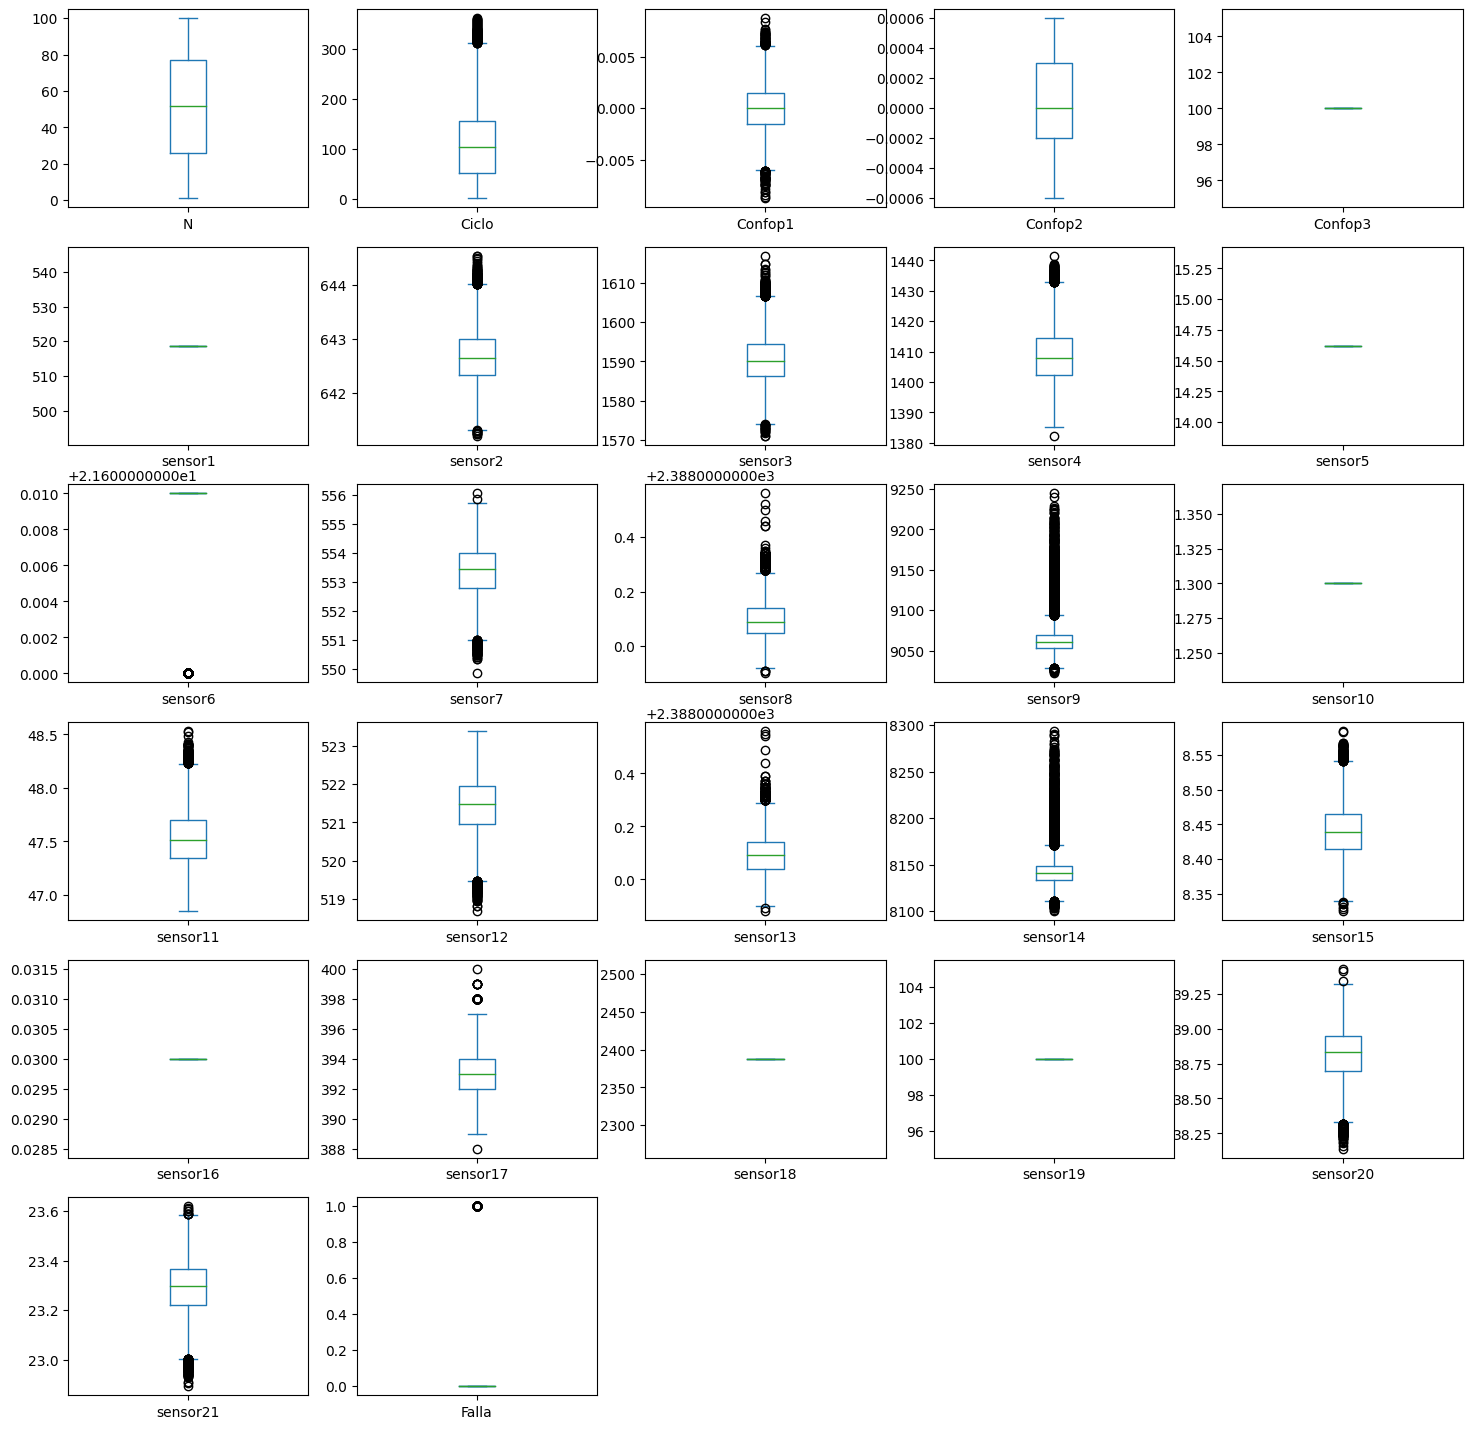

In [126]:
# box and whisker plots

from pandas.plotting import scatter_matrix
from matplotlib import pyplot
plt.rcParams["figure.figsize"] = (18, 18)
Data.plot(kind='box', subplots=True, layout=(6,5), sharex=False, sharey=False)
pyplot.show()

Este tipo de representación permite identificar de forma preliminar si existen asimetrías, datos atípicos o diferencia de varianzas. 
En este caso, los valores algunos presenta  una distribución simétrica otros no y tiene muchos valors extremos.

####  El tamaño de las cajas NO es similar para todos los niveles por lo que  hay indicios de falta de homocedasticidad.

### Histogramas de los valores

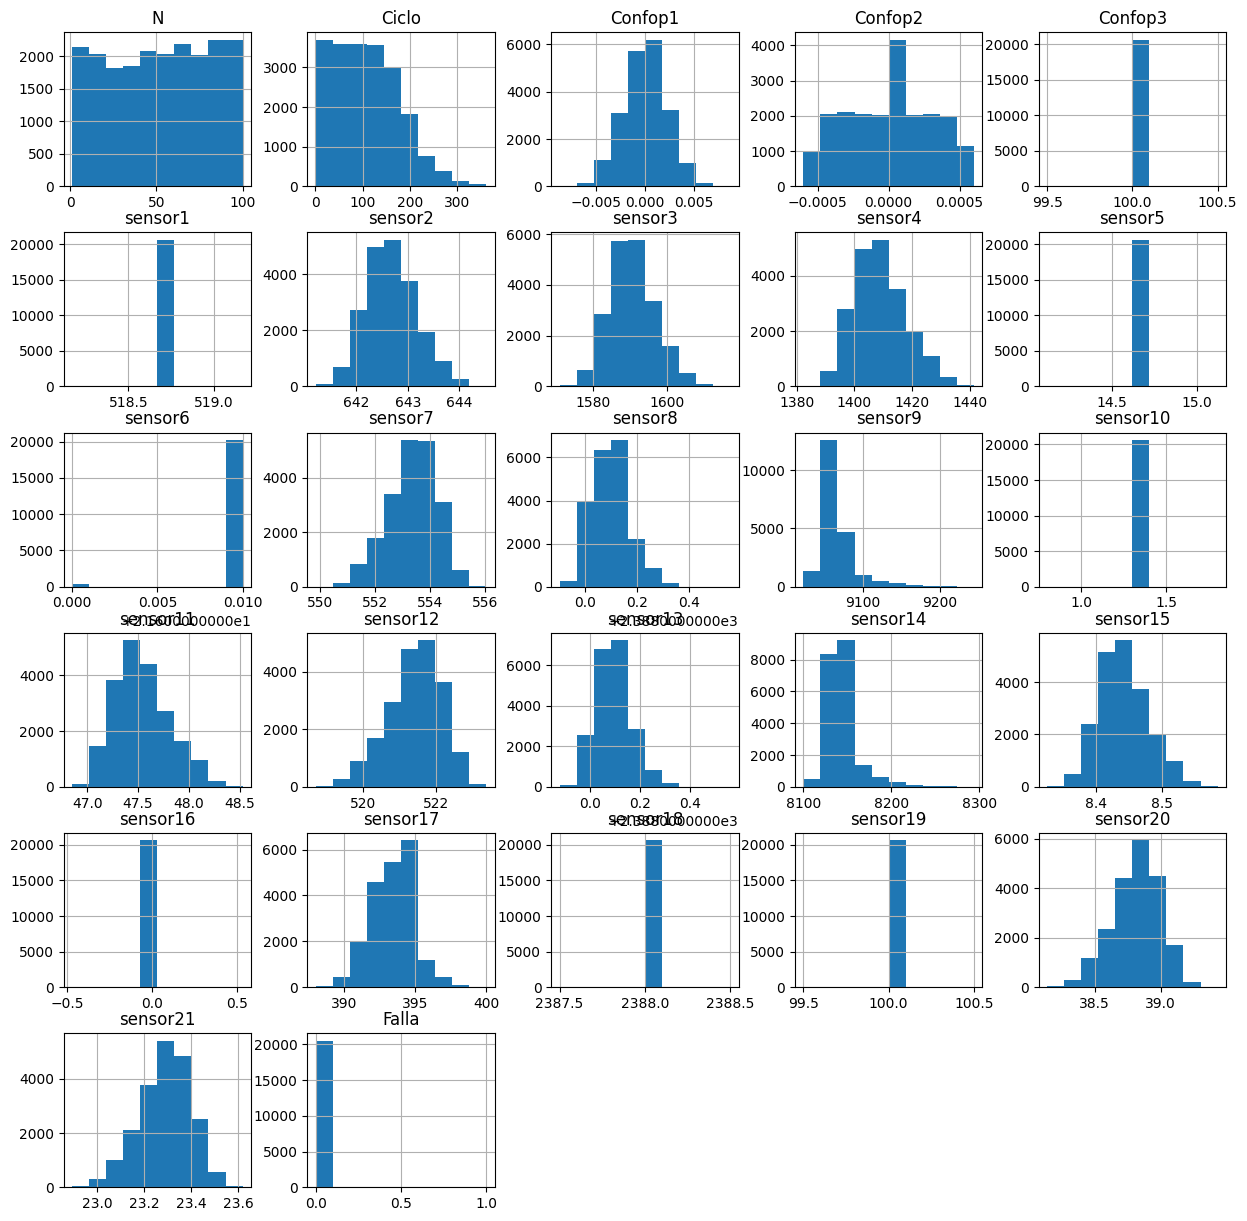

In [127]:
# Histogramas

plt.rcParams["figure.figsize"] = (15, 15)
#plt.show()


...
# histograms
Data.hist()
pyplot.show()

### Análisis de los Graficos .

Hay valores de los diferentes sensores que no muestran una distribución Normal. hay muchos valores extremos atípico, lo que indica que no podriamos hacer un modelo lineal, se detectan algunos valores extremos que habrá que estudiar con detalle por si fuese necesario eliminarlos. 




# Análisis exploratorio de datos (EDA)
Vamos ahora con el analisis exploratorio de las variables (EDA), lo que vamos a conseguir es observar las correlaciones entre las variables, el balanceo de la variable objetivo y patrones raros que puedan surgir.

El concepto de balanceo lo que consigue es que exista un mínimo de datos de un tipo de resultado de una variable como para que el modelo pueda predecir con éxito.

Por ejemplo, si obtenemos solo 3 datos entre 1000 que dicen que «Si habrá fallo en la maquina», entonces el modelo se acomodará a predecir que «No existe fallo en la maquina» , es decir, que incluso cuando el resultado sea que «Sí existe fallo» , el modelo al haber tan pocos resultados de «Sí habra fallo en la maquina» se habrá acomodado a decir que «No existe fallo».

Por eso es tan importante realizar un balanceo si fuera necesario.

Vamos a realizar el analisis explotario en las variables 

Posteriormente realizaremos un análisis de correlación entre todas las variables.

Finalmente observaremos el desbalanceo de la variable Fallo por si fuera necesario operar con su balanceo.

In [128]:
Data.Falla.value_counts () # Cantidad de valores de falla 99 cantidad de valores sin falla 20522

0    20532
1       99
Name: Falla, dtype: int64

Debemos establecer una data  con un proporción de 85 % no falla y 15 % falla para ellos debemos tomar los valores de Si falla filtrarlos , filtral los valores de nofalla filtrarlos tomar el porcentaje para que los valores de falla sean 15%   eso es un 3% de los 20532 .

In [129]:
sifalla = Data.query('Falla == 1')
sifalla

,N,Ciclo,Confop1,Confop2,Confop3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,Falla
191,1,192,0.0009,-0.0000,100.0,518.67,643.54,1601.41,1427.20,14.62,...,2388.32,8110.93,8.5113,0.03,396,2388,100.0,38.48,22.9649,1
478,2,287,-0.0005,0.0006,100.0,518.67,643.85,1608.50,1430.84,14.62,...,2388.21,8175.57,8.5365,0.03,398,2388,100.0,38.43,23.0848,1
657,3,179,0.0012,0.0000,100.0,518.67,643.51,1604.80,1428.23,14.62,...,2388.20,8255.34,8.5056,0.03,398,2388,100.0,38.40,22.9562,1
846,4,189,-0.0024,-0.0002,100.0,518.67,644.53,1612.11,1432.55,14.62,...,2388.16,8259.42,8.5246,0.03,398,2388,100.0,38.44,23.1006,1
1115,5,269,0.0022,0.0003,100.0,518.67,643.46,1597.28,1430.74,14.62,...,2388.16,8212.75,8.5209,0.03,397,2388,100.0,38.45,23.0296,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19551,95,283,0.0019,0.0003,100.0,518.67,643.43,1609.16,1430.97,14.62,...,2388.20,8183.58,8.5648,0.03,396,2388,100.0,38.37,23.1041,1
19887,96,336,-0.0031,-0.0005,100.0,518.67,643.74,1599.20,1432.12,14.62,...,2388.24,8144.03,8.5022,0.03,397,2388,100.0,38.36,23.0258,1
20089,97,202,0.0014,0.0001,100.0,518.67,643.79,1610.66,1427.41,14.62,...,2388.15,8263.63,8.5277,0.03,397,2388,100.0,38.29,23.1184,1
20245,98,156,0.0077,-0.0003,100.0,518.67,643.02,1603.77,1432.16,14.62,...,2388.26,8122.22,8.5308,0.03,396,2388,100.0,38.33,23.1137,1


In [130]:
nofalla = Data.query('Falla == 0')
nofalla  = nofalla.sample(frac =.03) # tomamos el 3% de los no falla . 
nofalla

,N,Ciclo,Confop1,Confop2,Confop3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,Falla
9431,48,167,-0.0019,-0.0003,100.0,518.67,641.53,1591.51,1401.43,14.62,...,2387.96,8175.82,8.4383,0.03,392,2388,100.0,38.90,23.2416,0
12700,64,220,-0.0019,-0.0002,100.0,518.67,643.16,1593.21,1419.41,14.62,...,2388.12,8149.54,8.4970,0.03,395,2388,100.0,38.84,23.2531,0
16014,80,62,-0.0064,0.0001,100.0,518.67,642.82,1587.98,1413.99,14.62,...,2388.08,8134.98,8.4692,0.03,393,2388,100.0,38.77,23.2208,0
8322,43,85,-0.0003,-0.0001,100.0,518.67,642.11,1586.98,1402.42,14.62,...,2388.06,8136.05,8.4479,0.03,392,2388,100.0,38.93,23.3624,0
14870,74,107,-0.0020,-0.0004,100.0,518.67,642.72,1585.41,1405.97,14.62,...,2388.13,8142.34,8.4422,0.03,393,2388,100.0,38.81,23.2887,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13844,69,214,0.0040,-0.0004,100.0,518.67,642.71,1596.93,1410.32,14.62,...,2388.10,8142.60,8.4249,0.03,392,2388,100.0,38.78,23.1653,0
1417,7,114,0.0005,0.0002,100.0,518.67,642.44,1588.32,1405.78,14.62,...,2388.02,8151.74,8.4296,0.03,393,2388,100.0,39.05,23.3857,0
14835,74,72,-0.0016,0.0002,100.0,518.67,642.48,1588.87,1401.00,14.62,...,2388.01,8145.12,8.4331,0.03,393,2388,100.0,38.80,23.4176,0
1831,9,119,-0.0034,-0.0002,100.0,518.67,642.37,1586.73,1397.87,14.62,...,2388.00,8161.07,8.4293,0.03,393,2388,100.0,38.95,23.4278,0


In [132]:
#Unimos los valores de cada una de las datas
NewData = pd.concat([sifalla, nofalla])
NewData

,N,Ciclo,Confop1,Confop2,Confop3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,Falla
191,1,192,0.0009,-0.0000,100.0,518.67,643.54,1601.41,1427.20,14.62,...,2388.32,8110.93,8.5113,0.03,396,2388,100.0,38.48,22.9649,1
478,2,287,-0.0005,0.0006,100.0,518.67,643.85,1608.50,1430.84,14.62,...,2388.21,8175.57,8.5365,0.03,398,2388,100.0,38.43,23.0848,1
657,3,179,0.0012,0.0000,100.0,518.67,643.51,1604.80,1428.23,14.62,...,2388.20,8255.34,8.5056,0.03,398,2388,100.0,38.40,22.9562,1
846,4,189,-0.0024,-0.0002,100.0,518.67,644.53,1612.11,1432.55,14.62,...,2388.16,8259.42,8.5246,0.03,398,2388,100.0,38.44,23.1006,1
1115,5,269,0.0022,0.0003,100.0,518.67,643.46,1597.28,1430.74,14.62,...,2388.16,8212.75,8.5209,0.03,397,2388,100.0,38.45,23.0296,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13844,69,214,0.0040,-0.0004,100.0,518.67,642.71,1596.93,1410.32,14.62,...,2388.10,8142.60,8.4249,0.03,392,2388,100.0,38.78,23.1653,0
1417,7,114,0.0005,0.0002,100.0,518.67,642.44,1588.32,1405.78,14.62,...,2388.02,8151.74,8.4296,0.03,393,2388,100.0,39.05,23.3857,0
14835,74,72,-0.0016,0.0002,100.0,518.67,642.48,1588.87,1401.00,14.62,...,2388.01,8145.12,8.4331,0.03,393,2388,100.0,38.80,23.4176,0
1831,9,119,-0.0034,-0.0002,100.0,518.67,642.37,1586.73,1397.87,14.62,...,2388.00,8161.07,8.4293,0.03,393,2388,100.0,38.95,23.4278,0


In [133]:
NewData1=NewData.sample(frac=1).reset_index(drop=True) # ordenamos los valores aleatoriamente para que no esten las fallas inicialmente
NewData1

,N,Ciclo,Confop1,Confop2,Confop3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,Falla
0,76,200,0.0028,0.0005,100.0,518.67,643.93,1601.24,1424.86,14.62,...,2388.21,8128.02,8.4650,0.03,395,2388,100.0,38.55,23.1532,0
1,65,10,0.0003,-0.0001,100.0,518.67,642.44,1583.31,1402.04,14.62,...,2388.09,8145.51,8.3829,0.03,391,2388,100.0,38.79,23.2399,0
2,46,216,-0.0011,-0.0004,100.0,518.67,642.99,1593.96,1421.80,14.62,...,2388.17,8134.67,8.4470,0.03,393,2388,100.0,38.60,23.2757,0
3,2,161,-0.0031,0.0003,100.0,518.67,642.08,1586.65,1396.32,14.62,...,2388.04,8140.21,8.4601,0.03,393,2388,100.0,38.83,23.4036,0
4,76,208,-0.0011,0.0002,100.0,518.67,643.64,1606.72,1432.06,14.62,...,2388.24,8134.88,8.5155,0.03,396,2388,100.0,38.52,23.1379,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
710,31,234,0.0023,-0.0001,100.0,518.67,643.50,1599.79,1425.76,14.62,...,2388.35,8116.96,8.4871,0.03,397,2388,100.0,38.46,23.0314,1
711,38,172,-0.0006,-0.0005,100.0,518.67,643.02,1597.33,1424.64,14.62,...,2388.15,8182.07,8.4902,0.03,394,2388,100.0,38.62,23.0322,0
712,79,199,-0.0023,-0.0004,100.0,518.67,643.57,1598.35,1436.93,14.62,...,2388.21,8165.30,8.5273,0.03,397,2388,100.0,38.40,23.1076,1
713,74,166,0.0011,0.0003,100.0,518.67,643.29,1604.39,1431.14,14.62,...,2388.25,8123.87,8.5309,0.03,398,2388,100.0,38.36,22.9906,1


In [134]:
NewData1.describe(include="all") # analizamos todos los datos





,N,Ciclo,Confop1,Confop2,Confop3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,Falla
count,715.000000,715.000000,715.000000,715.000000,715.0,7.150000e+02,715.000000,715.000000,715.000000,7.150000e+02,...,715.000000,715.00000,715.000000,7.150000e+02,715.000000,715.0,715.0,715.000000,715.000000,715.000000
mean,51.191608,123.356643,-0.000185,-0.000004,100.0,5.186700e+02,642.817189,1591.906965,1411.967343,1.462000e+01,...,2388.117650,8147.25758,8.453732,3.000000e-02,393.640559,2388.0,100.0,38.760909,23.260387,0.138462
std,29.097411,73.732806,0.002172,0.000302,0.0,6.825985e-13,0.595414,7.130969,11.371861,9.954562e-14,...,0.088897,26.85901,0.045514,7.985314e-17,1.889312,0.0,0.0,0.217896,0.130966,0.345626
min,1.000000,1.000000,-0.006400,-0.000600,100.0,5.186700e+02,641.370000,1575.950000,1387.560000,1.462000e+01,...,2387.940000,8102.82000,8.335800,3.000000e-02,388.000000,2388.0,100.0,38.190000,22.907100,0.000000
25%,26.000000,62.000000,-0.001700,-0.000300,100.0,5.186700e+02,642.370000,1586.660000,1403.205000,1.462000e+01,...,2388.050000,8133.05000,8.420000,3.000000e-02,392.000000,2388.0,100.0,38.610000,23.174450,0.000000
50%,52.000000,119.000000,-0.000200,0.000000,100.0,5.186700e+02,642.730000,1590.860000,1409.340000,1.462000e+01,...,2388.110000,8141.96000,8.447700,3.000000e-02,393.000000,2388.0,100.0,38.800000,23.280300,0.000000
75%,76.000000,179.000000,0.001300,0.000300,100.0,5.186700e+02,643.250000,1596.710000,1420.700000,1.462000e+01,...,2388.170000,8151.13000,8.487650,3.000000e-02,395.000000,2388.0,100.0,38.920000,23.353650,0.000000
max,100.000000,362.000000,0.007700,0.000600,100.0,5.186700e+02,644.530000,1612.630000,1441.490000,1.462000e+01,...,2388.560000,8293.72000,8.566800,3.000000e-02,399.000000,2388.0,100.0,39.240000,23.589000,1.000000


### Definimos los datos para el modelo

In [135]:
# Definamos X, e y para nuestro set de datos:

X = np.asarray(NewData1[["Ciclo", "Confop1", "Confop2", "Confop3", 
                 "sensor1", "sensor2", "sensor3", "sensor4", "sensor5", 
                 "sensor6", "sensor7", "sensor8", "sensor9", "sensor10", "sensor11",
                 "sensor12", "sensor13", "sensor14", "sensor15", "sensor16","sensor17",
                 "sensor18", "sensor19", "sensor20" , "sensor21"]])

y = np.asarray(NewData1['Falla'])





#### Estandarizando los datos

In [136]:
#También, normalicemos el set de datos:

from sklearn import preprocessing

X = preprocessing.StandardScaler().fit(X).transform(X)



### Entrenar/Probar el set de datos
Ahora, dividamos nuestro set de datos en dos sets, entrenamiento y prueba 20% de los datos:

In [137]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

print ('Train set:', X_train.shape,  y_train.shape)

print ('Test set:', X_test.shape,  y_test.shape)


Train set: (572, 25) (572,)
Test set: (143, 25) (143,)


### Modelando (Regresión Logística con Scikit-learn)
Construyamos nuestro modelo utilizando LogisticRegression con el package Scikit-learn. Esta función implementa regresión logística y puede usar distintos optimizadores numéricos para encontrar parámetros, a saber, ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’ solvers. Puedes también encontrar más información sobre los pros y contras de estos optimizadores si buscas en internet.

La versión de Regresión Logística soporta regularización. Esto es, una técnica que soluciona problemas de sobreajuste en modelos de machine learning. El parámetro C indica fuerza de regularización inversa la cual debe ser un número flotante positivo. Valores más pequeños indican regularización más fuerte. Llenemos nuesto modelo con el subconjunto de entrenamiento:

In [138]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix

LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)

LR


LogisticRegression(C=0.01, solver='liblinear')

In [139]:
#Ahora, podremos predecir usando nuestro set de prueba:

yhat = LR.predict(X_test)

yhat


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

Predict_proba devuelve estimaciones para todas las clases. La primer columna es la probabilidad de la clase 1, P(Y=1|X), y la segunda columna es la probabilidad de la clase 0, P(Y=0|X):



In [140]:
yhat_prob = LR.predict_proba(X_test)

yhat_prob


array([[0.95, 0.05],
       [0.89, 0.11],
       [0.65, 0.35],
       [0.84, 0.16],
       [0.91, 0.09],
       [0.69, 0.31],
       [0.94, 0.06],
       [0.9 , 0.1 ],
       [0.93, 0.07],
       [0.93, 0.07],
       [0.93, 0.07],
       [0.97, 0.03],
       [0.96, 0.04],
       [0.96, 0.04],
       [0.96, 0.04],
       [0.96, 0.04],
       [0.86, 0.14],
       [0.79, 0.21],
       [0.96, 0.04],
       [0.92, 0.08],
       [0.95, 0.05],
       [0.81, 0.19],
       [0.86, 0.14],
       [0.69, 0.31],
       [0.55, 0.45],
       [0.98, 0.02],
       [0.43, 0.57],
       [0.36, 0.64],
       [0.3 , 0.7 ],
       [0.98, 0.02],
       [0.97, 0.03],
       [0.98, 0.02],
       [0.88, 0.12],
       [0.97, 0.03],
       [0.94, 0.06],
       [0.52, 0.48],
       [0.35, 0.65],
       [0.94, 0.06],
       [0.27, 0.73],
       [0.79, 0.21],
       [0.97, 0.03],
       [0.32, 0.68],
       [0.97, 0.03],
       [0.97, 0.03],
       [0.6 , 0.4 ],
       [0.97, 0.03],
       [0.97, 0.03],
       [0.94,

## Evaluación del Modelo

### Índice jaccard
Probemos con el índice jaccard para la evaluación de precisión. Podemos definir como jaccard al tamaño de la intersección dividida por el tamaño de la unión de dos set de etiquetas. Si todo el set de etiquetas de muestra predichas coinciden con el set real de etiquetas, entonces la precisión es 1.0; sino, sería 0.0.

In [38]:
#from sklearn.metrics import jaccard_similarity_score
#from sklearn.metrics import jaccard_similarity_score
#jaccard_similarity_score(y_test, yhat)
#sklearn.metrics.jaccard_similarity_score(y_test, yhat)

### Matriz de confusión
Otra forma de mirar la precisión del clasificador es ver la matriz de confusión.

In [141]:
from sklearn.metrics import classification_report, confusion_matrix

import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):

  """

  Esta función muestra y dibuja la matriz de confusión.

  La normalización se puede aplicar estableciendo el valor `normalize=True`.

  """

  if normalize:

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    print("Matriz de confusión normalizada")

  else:

    print('Matriz de confusión sin normalización')

 

  print(cm)

 

  plt.imshow(cm, interpolation='nearest', cmap=cmap)

  plt.title(title)

  plt.colorbar()

  tick_marks = np.arange(len(classes))

  plt.xticks(tick_marks, classes, rotation=45)

  plt.yticks(tick_marks, classes)

 

  fmt = '.2f' if normalize else 'd'

  thresh = cm.max() / 2.

  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):

    plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

 

  plt.tight_layout()

  plt.ylabel('Etiqueta Real')

  plt.xlabel('Etiqueta Predicha')

print(confusion_matrix(y_test, yhat, labels=[1,0]))


[[ 11   0]
 [  4 128]]


Matriz de confusión sin normalización
[[ 11   0]
 [  4 128]]


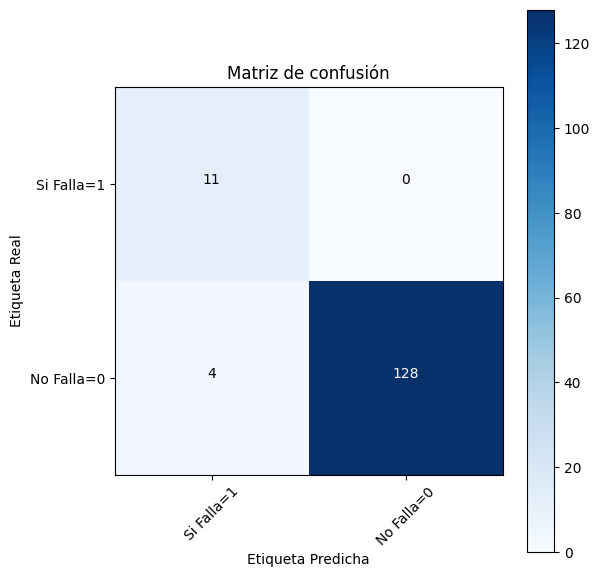

In [142]:
# Calcular la matriz de confusión
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (6, 6)
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])

np.set_printoptions(precision=2)
 
# Dibujar la matriz de confusión no normalizada

plt.figure()

plot_confusion_matrix(cnf_matrix, classes=['Si Falla=1','No Falla=0'],normalize= False, title='Matriz de confusión')
plt.show() 


### La Matriz de Confusión indica que para valores de Falla 11 son ciertos y 0 falso , para valores de noFalla 128 son verdaderos y 4 falsos.

In [144]:
print (classification_report(y_test, yhat))
             

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       132
           1       0.73      1.00      0.85        11

    accuracy                           0.97       143
   macro avg       0.87      0.98      0.92       143
weighted avg       0.98      0.97      0.97       143



Partiendo de la cantidad de cada sección podemos calcular la precisión y el grado(recall) de cada etiqueta:

Precision es una medida de certeza basada en una etiqueta predicha. Se define de esta forma: precision = TP / (TP + FP)
Recall es un grado positivo verdadero. Se define de esta forma: Recall = TP / (TP + FN)
Por lo tanto, podemos calcular la precisión y grado de cada clase.

F1 score: Ahora estamos en condiciones de calcular los puntajes F1 para cada etiqueta basada en la precisión y grado de cada etiqueta.

El puntaje F1 es el promedio armónico de la precisión y grado, donde un grado F1 alcanza su mejor valor en 1 (precisión y grado perfectos) y peor escenario en 0. Es una buena forma de mostrar que un clasificador tiene un buen valor tanto para la precisión como para el grado.

Y finalmente, podemos decir que la exactitud promedio para este clasificador es el promedio del score f1 para ambas etiquetas, cuyo valor es is 0.97  en nuestro caso.

### El fi score de la predicción del Modelos es de 97%

In [145]:
from sklearn.metrics import log_loss

log_loss(y_test, yhat_prob)


0.19421393620137728

### Falta determinar para una nueva lista de valores probar el modelo y determinar el valor de ciclo antes de la falla.